In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math


In [13]:
data_train_file = './train.csv'
data_test_file = './test.csv'

df_train = pd.read_csv(data_train_file)
df_test = pd.read_csv(data_test_file)

Below is linear relation of LotArea and SalePrice

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

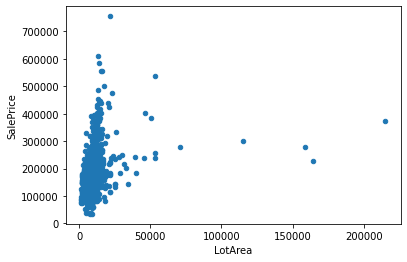

In [16]:
import matplotlib.pyplot as plt
variables = df_train[["LotArea", "SalePrice"]]
length = len(variables.index.astype(int))
variables.dropna()
test_variables = variables.iloc[int(length-length/4):]
variables = variables.iloc[:int(length-length/4)]
variables.plot.scatter(x='LotArea', y='SalePrice')


Cleaning up dataframe

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

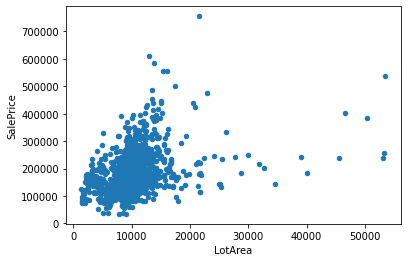

In [17]:
index_names = variables[ (variables['LotArea'] > 60000)].index 
variables.drop(index_names, inplace = True) 
variables.plot.scatter(x='LotArea', y='SalePrice')


Below are necessary functions for calculating linear regression equation
Y = B0 + B1*X
Y-dependent variable
X-independent variable
B0 - intercept
B1 - slope

In [20]:

def calculateMean(valuesArray):
    sum = float(0);
    for x in valuesArray: 
        sum += x
    return float(sum)/len(valuesArray)


def sumOfResiduals(xMean,yMean, xArr, yArr): 
    sum = float(0)
    for x in range(0, len(xArr)):
        sum += float((xArr[x]-xMean)*(yArr[x]-yMean))
    return float(sum)

def sumOfSSE(xMean, xArr):
    sum = float(0)
    for x in xArr:
        sum+=float((x-xMean)**2)
    return sum

def intercept(meanY, meanX, slope):
    return float(meanY)-(slope*meanX)
def slope(sumOfResiduals, sumOfSSE):
    return float(sumOfResiduals)/float(sumOfSSE)

def predict(indepVar, slope, intercept):
    depVar = intercept+(slope*indepVar)
    return depVar

def calcSSR(yPredArray, yMean):
    total = 0
    for y in yPredArray:
        total+=(y-yMean)**2
    return total
    
def calcSST(yActArray, yMean):
    total = 0
    for y in yActArray:
        total+=(y-yMean)**2
    return total
def fit(_xArr, _yArr):
    _xMean = calculateMean(_xArr.tolist())
    _yMean = calculateMean(_yArr.tolist())
    _sumOfResiduals = sumOfResiduals(_xMean, _yMean, _xArr.tolist(), _yArr.tolist())
    _sumOfSSE = sumOfSSE(_xMean, _xArr.tolist())
    _slope = slope(_sumOfResiduals, _sumOfSSE)
    _intercept = intercept(_yMean, _xMean, _slope)
    return {
        "slope": _slope,
        "intercept": _intercept,
        "xMean": _xMean,
        "yMean": _yMean,
        "SSR": _sumOfResiduals,
        "SSE": _sumOfSSE
    }


Fitting the model 

In [21]:
#LotArea is x and SalePrice is y
_xArr = variables["LotArea"]
_yArr = variables["SalePrice"]
fitObject=fit(_xArr, _yArr)
print(fitObject)


{'slope': 5.8609806925885, 'intercept': 122437.00988416973, 'xMean': 9971.202752293579, 'yMean': 180878.0366972477, 'SSR': 173263870736.88995, 'SSE': 29562266082.191788}


Creating the regression line for evaluate model

122442.87086486231 825754.6929947897


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

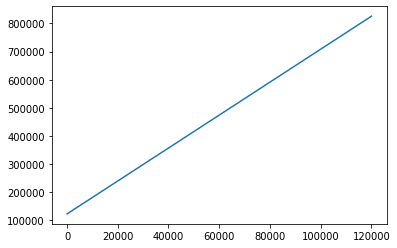

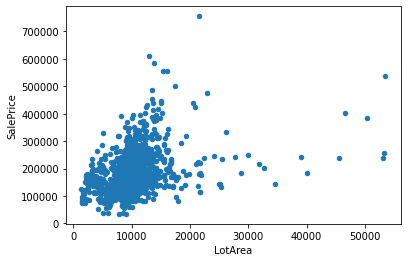

In [22]:
#The regression line must pass through centroid 
#The centroid must be at point (xMean, yMean)
#x=1 uyd y
y1 = predict(1, fitObject["slope"], fitObject["intercept"])
#x=8000 uyd y
y2 = predict(120000, fitObject["slope"], fitObject["intercept"])
print(y1, y2)
plt.plot([1, fitObject["xMean"], 120000], [y1, fitObject["yMean"], y2])
variables.plot.scatter(x='LotArea', y='SalePrice')


Calculating coefficient of determination

In [23]:
predictedSalePrice = []
for x in test_variables["LotArea"].tolist():
    predictedSalePrice.append(predict(x,_slope,_intercept))
predictedSalePrice

coefOfDeter = calcSSR(predictedSalePrice, _yMean)/calcSST(test_variables["SalePrice"].tolist(),_yMean)
print("Coefficient of determination is: ",math.sqrt(coefOfDeter))
print("Sqr root of coefOfDeter", coefOfDeter)


Coefficient of determination is:  0.33128170752354047
Sqr root of coefOfDeter 0.10974756973971261


Comparing predicted values with actual values

In [24]:
test_variables["predicted"]=predictedSalePrice
test_variables

,LotArea,SalePrice,predicted
1095,9317,176432,177585.313874
1096,6882,127000,167030.834496
1097,3696,170000,153221.154291
1098,6000,128000,163207.815682
1099,11880,157000,188694.607774
...,...,...,...
1455,7917,175000,171517.030043
1456,13175,210000,194307.770318
1457,9042,266500,176393.329550
1458,9717,142125,179319.109255
